# HepMC3 Interface: IO and visualization

impy uses the pyhepmc library for event IO and visualization. Visualization of the event is useful to understand the particle history. Not all generators produce a history. Here we generate an event with Pythia6 which has full history.

For the visualization to work, the optional package graphviz is required.

In [1]:
import impy.models as im
from impy.kinematics import EventKinematics
from impy.constants import GeV
from particle import literals as lp

In [2]:
ekin = EventKinematics(
    ecm=100 * GeV, p1pdg=2212, p2pdg=2212
)

model = im.Pythia6(ekin, seed=1)

# decay pi0 in the generator
model.set_stable(lp.pi_0.pdgid, False)

# generate one event
for event in model(1):
    pass

1                                                                              
 ******************************************************************************
 ******************************************************************************
 **                                                                          **
 **                                                                          **
 **              *......*                  Welcome to the Lund Monte Carlo!  **
 **         *:::!!:::::::::::*                                               **
 **      *::::::!!::::::::::::::*          PPP  Y   Y TTTTT H   H III   A    **
 **    *::::::::!!::::::::::::::::*        P  P  Y Y    T   H   H  I   A A   **
 **   *:::::::::!!:::::::::::::::::*       PPP    Y     T   HHHHH  I  AAAAA  **
 **   *:::::::::!!:::::::::::::::::*       P      Y     T   H   H  I  A   A  **
 **    *::::::::!!::::::::::::::::*!       P      Y     T   H   H III A   A  **
 **      *::::::!!::::::::::::::* !!    

To get a look at the event, we can call its `repr`, but the output is a bit confusing. impy gives access to the Fortran HepEvt record, which is a very compact and efficient format, but it is not easy to see what is going on.

In [3]:
event

PYTHIA6Event(kin=Event kinematics:
	ecm      :  100.00000
	pcm      :   49.98239
	elab     : 5328.01821
	plab     : 5328.01813
	gamma_cm :   53.28956
	bgamm_cm :   53.28018
	pdgid 1  :       2212
	nucprop 1: 1/1.0
	pdgid 2  :       2212
	nucprop 2: 1/1.0
, frame='center-of-mass', nevent=0, pid=array([2212, 2212,    1,    1,    1,    1,    1,    1,    1, 2203,    1,
       2203,   92,  331,  111, -211,  211, 2112,  211,   92,  113,  221,
       2214,  111,   22,  113,   22,   22,  211, -211,   22,   22, 2212,
        111,   22,   22, -211,  211,   22,   22], dtype=int32), status=array([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int32), charge=array([ 1.        ,  1.        , -0.33333333, -0.33333333, -0.33333333,
       -0.33333333, -0.33333333, -0.33333333, -0.33333333,  1.33333333,
       -0.33333333,  1.33333333,  0.        ,  0.        ,  0.        ,
       -1.        ,  1.        ,  0.       

Fundamentally, a collision is a directed graph. The HepMC3 library represents events directly in graph format. This is particularly useful to visualize the event. We convert the impy event to HepMC3 format.

In [4]:
hev = event.to_hepmc3()

If you have `graphviz` installed, the HepMC3 event will be visualized directly in the notebook.

In [5]:
hev

GenEvent(momentum_unit=1, length_unit=0, event_number=0, particles=[GenParticle(FourVector(0, 0, 49.9912, 50), mass=0.93827, pid=2212, status=3), GenParticle(FourVector(0, 0, -49.9912, 50), mass=0.93827, pid=2212, status=3), GenParticle(FourVector(-0.0218069, 0.588053, -0.484662, 0.762351), mass=-0, pid=1, status=3), GenParticle(FourVector(-2.13995, 0.630665, -5.55995, 5.99084), mass=-0, pid=1, status=3), GenParticle(FourVector(-0.0218069, 0.588053, -0.484662, 0.762351), mass=0, pid=1, status=3), GenParticle(FourVector(-2.13995, 0.630665, -5.55995, 5.99084), mass=0, pid=1, status=3), GenParticle(FourVector(-2.24289, 0.809216, -5.4337, 5.94301), mass=0.33, pid=1, status=3), GenParticle(FourVector(0.0811372, 0.409502, -0.610907, 0.810174), mass=0.33, pid=1, status=3), GenParticle(FourVector(-2.24289, 0.809216, -5.4337, 5.94301), mass=0.33, pid=1, status=2), GenParticle(FourVector(0.0218069, -0.588053, 49.609, 49.6185), mass=0.77133, pid=2203, status=2), GenParticle(FourVector(0.0811372, 0.409502, -0.610907, 0.810174), mass=0.33, pid=1, status=2), GenParticle(FourVector(2.13995, -0.630665, -43.5644, 43.6283), mass=0.77133, pid=2203, status=2), GenParticle(FourVector(-2.22109, 0.221163, 44.1753, 55.5615), mass=33.625, pid=92, status=2), GenParticle(FourVector(-1.1738, 0.807657, -3.07986, 3.52616), mass=0.958206, pid=331, status=2), GenParticle(FourVector(-0.315195, -0.0359806, 0.299005, 0.456361), mass=0.13498, pid=111, status=2), GenParticle(FourVector(-0.706375, 0.0310317, -2.16587, 2.28263), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.456129, -0.475147, 8.12147, 8.14933), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.900444, -0.251262, 6.08324, 6.22596), mass=0.93957, pid=2112, status=1), GenParticle(FourVector(-0.470031, 0.144864, 34.9173, 34.9211), mass=0.13957, pid=211, status=1), GenParticle(FourVector(2.22109, -0.221163, -44.1753, 44.4385), mass=4.28236, pid=92, status=2), GenParticle(FourVector(0.599678, 0.345106, -3.381, 3.51249), mass=0.653977, pid=113, status=2), GenParticle(FourVector(0.10839, -0.420274, -12.3311, 12.3509), mass=0.54745, pid=221, status=2), GenParticle(FourVector(1.27904, 0.40035, -20.0443, 20.1342), mass=1.34722, pid=2214, status=2), GenParticle(FourVector(0.233978, -0.546345, -8.41888, 8.44092), mass=0.13498, pid=111, status=2), GenParticle(FourVector(-0.378665, 0.138043, -0.5727, 0.700306), mass=0, pid=22, status=1), GenParticle(FourVector(-0.795136, 0.669613, -2.50716, 2.82585), mass=0.786756, pid=113, status=2), GenParticle(FourVector(-0.065399, -0.0409223, 0.141063, 0.160781), mass=0, pid=22, status=1), GenParticle(FourVector(-0.249796, 0.00494172, 0.157942, 0.29558), mass=0, pid=22, status=1), GenParticle(FourVector(-0.0996654, 0.0618202, -0.555898, 0.585027), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.699344, 0.283285, -2.8251, 2.92746), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.0756544, -0.485614, -7.70899, 7.72464), mass=0, pid=22, status=1), GenParticle(FourVector(0.184045, 0.0653403, -4.62216, 4.62628), mass=0, pid=22, status=1), GenParticle(FourVector(1.3147, 0.505037, -16.7526, 16.8379), mass=0.93827, pid=2212, status=1), GenParticle(FourVector(-0.0356568, -0.104686, -3.29166, 3.29629), mass=0.13498, pid=111, status=2), GenParticle(FourVector(0.102317, -0.397159, -5.80513, 5.8196), mass=0, pid=22, status=1), GenParticle(FourVector(0.131662, -0.149186, -2.61376, 2.62132), mass=0, pid=22, status=1), GenParticle(FourVector(-0.462743, -0.0590748, -0.836983, 0.968319), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.332393, 0.728688, -1.67018, 1.85754), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.0743585, -0.0137693, -1.47207, 1.47401), mass=0, pid=22, status=1), GenParticle(FourVector(0.0387017, -0.0909169, -1.8196, 1.82228), mass=0, pid=22, status=1)], vertices=[GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0))

This scalable SVG image is generated with the function `pyhepmc.view.to_dot`, which produces a `DiGraph` object. It is possible to manipulate this object, for example, to change the size of the image. For details, see the `graphviz` docs.

In [6]:
from pyhepmc.view import to_dot

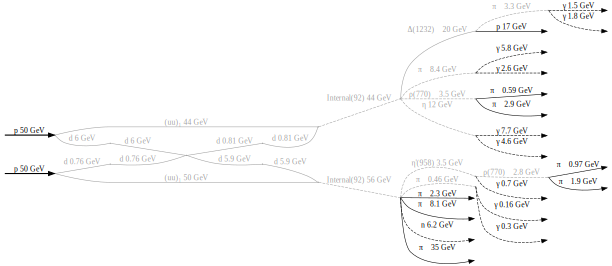

In [7]:
d = to_dot(hev)
d.graph_attr["size"] = "8.5,7"
d

One can also change the engine to produce a very different visualization.

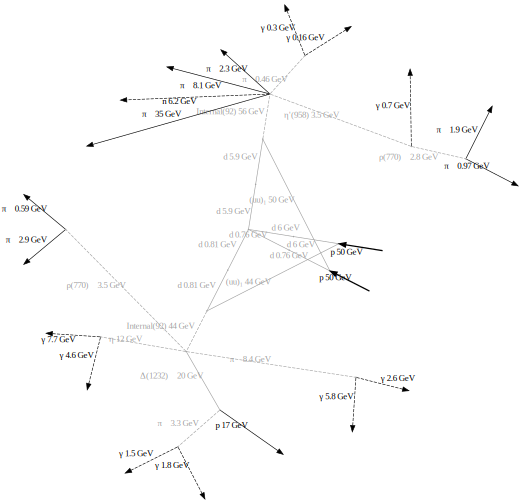

In [8]:
d.engine = "twopi"
d

Also important is the ability to save events and to pass them to other HEP software. The HepMC format is the common language in particle physics, which all tools understand. `pyhepmc` offers a Pythonic way to read/write events with an `open` function.

In [9]:
import pyhepmc

with pyhepmc.open("pythia6.dat", "w") as f:
    f.write(hev) # don't forget to convert event to HepMC3 format first

The format is human-readable ASCII.

In [10]:
with open("pythia6.dat") as f:
    print(f.read())

HepMC::Version 3.02.05
HepMC::Asciiv3-START_EVENT_LISTING
E 0 19 40
U GEV MM
P 1 0 2212 0.0000000000000000e+00 0.0000000000000000e+00 4.9991195718917339e+01 4.9999999999999993e+01 9.3827000000000005e-01 3
P 2 0 2212 0.0000000000000000e+00 0.0000000000000000e+00 -4.9991195718917339e+01 4.9999999999999993e+01 9.3827000000000005e-01 3
P 3 1 1 -2.1806871592392363e-02 5.8805329337607859e-01 -4.8466219038425701e-01 7.6235139816699049e-01 -0.0000000000000000e+00 3
P 4 2 1 -2.1399492116645962e+00 6.3066455563989210e-01 -5.5599470506278008e+00 5.9908373050875925e+00 -0.0000000000000000e+00 3
P 5 3 1 -2.1806871592392363e-02 5.8805329337607881e-01 -4.8466219038425762e-01 7.6235139816699082e-01 0.0000000000000000e+00 3
P 6 4 1 -2.1399492116645962e+00 6.3066455563989210e-01 -5.5599470506278017e+00 5.9908373050875934e+00 0.0000000000000000e+00 3
V -5 0 [5,6]
P 7 -5 1 -2.2428932413666449e+00 8.0921610252646115e-01 -5.4337023479006294e+00 5.9430145547808575e+00 3.3000000000000002e-01 3
P 8 -5 1 8.1137

We can also handle incomplete records, like the one from SIBYLL-2.1.

In [11]:
ekin = EventKinematics(
    ecm=100 * GeV, p1pdg=2212, p2pdg=2212
)

model = im.Sibyll21(ekin, seed=1)

# generate one event
for event in model(1):
    pass

 |                                                  |
 |                 S I B Y L L  2.1                 |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |                   Ralph ENGEL                    |
 |           R.S. FLETCHER, T.K. GAISSER            |
 |               P. LIPARI, T. STANEV               |
 |                                                  |
 | Publication to be cited when using this program: |
 | R. Engel et al., Proc. 26th ICRC, 1 (1999) 415   |
 |                                                  |
 | last modified:  28. Sept. 2001 by R. Engel       |


 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
    1   1.000E+01    1.45   38.33   30.88   10.83  -0.185   1.964   0.003
    1   1.259E+01    1.49   38.27   31.16   11.10  -0.127   1.949   0.006


Sibyll-2.1 has no particle history and no vertex information. Accordingly, the graph looks a bit boring.

In [12]:
hev2 = event.to_hepmc3()
hev2

GenEvent(momentum_unit=1, length_unit=0, event_number=0, particles=[GenParticle(FourVector(-0.635971, -0.0672664, 1.59014, 1.87824), mass=0.7683, pid=0, status=2), GenParticle(FourVector(0.309266, 0.21743, 1.86574, 2.05777), mass=0.7686, pid=0, status=2), GenParticle(FourVector(-0.575599, -0.431261, 8.69777, 8.72942), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.463847, 0.176484, 25.2621, 25.2844), mass=0.93827, pid=2212, status=1), GenParticle(FourVector(0.515636, -0.264303, 5.80551, 5.99598), mass=1.3828, pid=0, status=2), GenParticle(FourVector(0.149777, 0.727271, -0.0251288, 0.91775), mass=0.49365, pid=321, status=1), GenParticle(FourVector(-0.34058, -0.141058, 2.31336, 2.47412), mass=0.7683, pid=0, status=2), GenParticle(FourVector(0.0391631, -0.0387254, 3.51809, 3.60436), mass=0.78195, pid=0, status=2), GenParticle(FourVector(-0.233496, -0.280102, -3.89409, 3.91361), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.307957, 0.101531, -45.1335, 45.1444), mass=0.93957, pid=2112, status=1), GenParticle(FourVector(-0.0571388, 0.153565, 0.0623095, 0.224074), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.578838, -0.220832, 1.52784, 1.65419), mass=0.13497, pid=111, status=1), GenParticle(FourVector(0.48269, 0.23096, 1.65817, 1.75117), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.173421, -0.0135281, 0.20759, 0.306612), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.477026, -0.0349173, 4.39045, 4.55515), mass=1.11563, pid=3122, status=1), GenParticle(FourVector(0.0386119, -0.229386, 1.41507, 1.44084), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.454733, 0.0261307, 2.05674, 2.11731), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.11415, -0.16719, 0.256641, 0.356829), mass=0.13497, pid=111, status=1), GenParticle(FourVector(0.23528, -0.0827505, 2.39994, 2.4169), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.0678176, 0.0206795, 0.220561, 0.27047), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.128307, 0.0233471, 0.897658, 0.917069), mass=0.13497, pid=111, status=1)], vertices=[], run_info=None)

The serialized output is more compact then.

In [14]:
with pyhepmc.open("sibyll21.dat", "w") as f:
    f.write(hev2)
    
with open("sibyll21.dat") as f:
    print(f.read())

HepMC::Version 3.02.05
HepMC::Asciiv3-START_EVENT_LISTING
E 0 0 21
U GEV MM
P 1 0 0 -6.3597112894058228e-01 -6.7266426980495453e-02 1.5901356935501099e+00 1.8782439231872559e+00 7.6829999685287476e-01 2
P 2 0 0 3.0926612019538879e-01 2.1742968261241913e-01 1.8657438755035400e+00 2.0577671527862549e+00 7.6859998703002930e-01 2
P 3 0 211 -5.7559907436370850e-01 -4.3126103281974792e-01 8.6977729797363281e+00 8.7294225692749023e+00 1.3956999778747559e-01 1
P 4 0 2212 4.6384686231613159e-01 1.7648369073867798e-01 2.5262069702148438e+01 2.5284357070922852e+01 9.3826997280120850e-01 1
P 5 0 0 5.1563632488250732e-01 -2.6430293917655945e-01 5.8055062294006348e+00 5.9959793090820312e+00 1.3827999830245972e+00 2
P 6 0 321 1.4977657794952393e-01 7.2727096080780029e-01 -2.5128841400146484e-02 9.1774952411651611e-01 4.9364998936653137e-01 1
P 7 0 0 -3.4058013558387756e-01 -1.4105777442455292e-01 2.3133645057678223e+00 2.4741170406341553e+00 7.6829999685287476e-01 2
P 8 0 0 3.9163086563348770e-02 -3.